# 07A. Partial differntial equation: Modeling diffusion

### Mingyang Lu

### 3/7/2024

# Diffusion equationIn the previous section, we have discussed how to model Brownian motion with an SDE. For a 1-variable system$$\frac{dX}{dt} = \sqrt{2D}\eta(t) \tag{1} $$With an SDE, we describe the time dynamics of $X$. The resulted time trajectories are stochastic in nature. To understand the statistical behavior of the system, we can evaluate the mean and standard deviation of $X$. For a multi-stable system, we can also compute the transition rates between basins. Now, we will consider a different but complimentary approach, where instead we characterize the probability distribution of the system at a particular $X$ by the diffusion equation:$$\frac{\partial P(X,t)}{\partial t} = D \frac{\partial^2 P(X,t)}{\partial X^2} \tag{2} $$Equation (2) is different from the differential equations discussed in the previous sections, in that $P$ is a function of two variables $X$ and $t$. The term $\frac{\partial P}{\partial t}$ is a partial derivative, defined as$$\frac{\partial P(X,t)}{\partial t} = \lim_{\Delta t \to 0} \frac{P(X, t+\Delta t) - P(X, t)}{\Delta t} \tag{3}$$When evaluating the partial derivative, we only vary $t$ and keep $X$ constant.# Finite difference methodNow we will explore numerical methods to solve a PDE like Equation (2). Finite difference method is the most straightforward approach. For example, the left hand side of Equation (2) can be numerically computed by Equation (3) when $\Delta t$ is small enough. By Taylor expansion of $P(X, t+\Delta t)$, we have$$P(X, t+\Delta t) = P(X, t) + \frac{\partial P(X,t)}{\partial t} \Delta t + \frac{1}{2}\frac{\partial^2 P(X,t)}{\partial t^2} \Delta t^2 + O(\Delta t^3) \tag{4}$$From Equation (4), $$  \frac{P(X, t+\Delta t) - P(X, t)}{\Delta t} = \frac{\partial P(X,t)}{\partial t} + O(\Delta t) \tag{5}$$In other words, this approach gives the error of $\frac{\partial P(X,t)}{\partial t}$ at the level of $O(\Delta t)$.Now, let us consider the right hand side of Equation (2), where we encounter a second partial derivative. Using Taylor expansions,$$P(X + \Delta X, t) = P(X, t) + \frac{\partial P(X,t)}{\partial X} \Delta X + \frac{1}{2}\frac{\partial^2 P(X,t)}{\partial X^2} \Delta X^2 + \frac{1}{6}\frac{\partial^3 P(X,t)}{\partial X^3} \Delta X^3 + O(\Delta X^4) \tag{6}$$$$P(X - \Delta X, t) = P(X, t) - \frac{\partial P(X,t)}{\partial X} \Delta X + \frac{1}{2}\frac{\partial^2 P(X,t)}{\partial X^2} \Delta X^2 - \frac{1}{6}\frac{\partial^3 P(X,t)}{\partial X^3} \Delta X^3 + O(\Delta X^4) \tag{7}$$From Equations (6) and (7), we have$$  \frac{P(X + \Delta X, t) + P(X-\Delta X, t) - 2P(X, t)}{\Delta X^2} = \frac{\partial^2 P(X,t)}{\partial X^2} + O(\Delta X^2) \tag{8}$$This demonstrates that $\frac{\partial^2 P(X,t)}{\partial X^2}$ can be approximated by  $\frac{P(X + \Delta X, t) + P(X-\Delta X, t) - 2P(X, t)}{\Delta X^2}$.Together with Equations (5) and (2), we obtain\begin{equation}\begin{aligned}P(X, t+\Delta t) &= P(X, t) + \frac{\partial P(X,t)}{\partial t} \Delta t \\ &= P(X, t) + D \frac{\partial^2 P(X,t)}{\partial X^2} \Delta t  \\ &= P(X, t) + D \frac{P(X + \Delta X, t) + P(X-\Delta X, t) - 2P(X, t)}{\Delta X^2} \Delta t\end{aligned} \tag{9}\end{equation}This is similar to the Euler method for ODEs. We can apply this to any $X$ for a given time $t$ to obtain $P(X, t)$ for the next time point $t + \Delta t$. Because of the factor $\frac{\Delta t}{\Delta X^2}$, the distances between two adjacent grid points cannot to be small (why?). One can also use the 2nd order Runge-Kutta method for the time integration (think how).To fully solve $P(X, t)$ for any given $X$ and $t$, we also need to specify the boundary conditions and the initial conditions. For the boundary condition, we set $P(X, t) = 0$ for any boundary grid points, where $X = -l/2$ or $X = l/2$, $l$ is the size of the system. A boundary condition with specified values of $P$ is called [Dirichlet boundary condition](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition).Here is the implementation of the finite difference method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PDE integration with the finite difference method for a diffusion equation

def pde_fd_diffusion(ngrid, X_all, dX, dt, D, t0, t_total, p0):
    """
    Parameters:
    - ngrid: number of grid points
    - X_all: X values for each grid point
    - dX: X step size
    - dt: time step size
    - D: diffusion constant
    - t0: initial time
    - t_total: total simulation time
    - p0: initial condition: P(X, t = t0)
    
    Returns:
    - p: Final values of P(X, t)
    """
    t_all = np.arange(t0, t_total + dt, dt)
    nt_all = len(t_all)
    factor = D / dX**2 * dt
    p = p0.copy()  # Make a copy to avoid modifying the original array

    for i in range(nt_all - 1):
        p_plus_one = np.concatenate((p[1:], [0]))  # P(X + dX) for all Xs, 0 for boundary condition
        p_minus_one = np.concatenate(([0], p[:-1]))  # P(X - dX) for all Xs, 0 for boundary condition
        p = p + factor * (p_plus_one + p_minus_one - 2 * p)  # Finite difference to update all P(X, t)

    return p

# Diffusion from the centerWe consider an initial condition, where $P(X=0, t = 0) = 1$. This means that at $t = 0$, the system always starts from the origin $X=0$. Here is a simulation of this diffusion model.

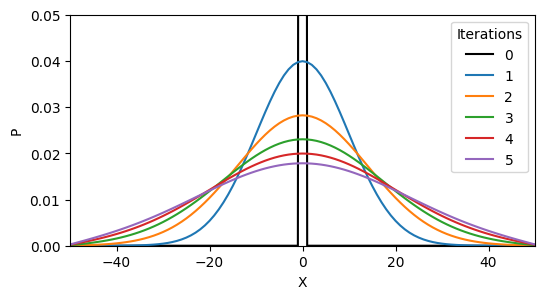

In [2]:
# Parameters
l = 100
dX = 1
dt = 0.01
D = 1
ngrid = int(l / dX) + 1

# Initialize X values for each grid point
X_all = (np.arange(1, ngrid + 1) - (ngrid + 1) / 2) * dX

# Initialize the state variable: a vector of P(X,t) for all grids at time t
p0 = np.zeros(ngrid)
p0[int((ngrid + 1) / 2) - 1] = 1  # Specify the initial condition, P = 1 for the center point

plt.figure(figsize=(6,3))
# Plot initial condition
plt.plot(X_all, p0, color='black', label='0')

# Iteratively apply the finite difference method and plot results
p_now = p0.copy()
for i in range(5):
    p_now = pde_fd_diffusion(ngrid=ngrid, X_all=X_all, dX=dX, dt=dt, D=D, t0=0, t_total=50, p0=p_now)
    plt.plot(X_all, p_now, label=f"{i + 1}")

# Plot settings
plt.xlabel('X')
plt.ylabel('P')
plt.xlim(-50, 50)
plt.ylim(0, 0.05)
plt.legend(title='Iterations', loc='upper right')
plt.show()

For a small fixed $t$, $P(X,t)$ is a Gaussian distribution. Now, we evaluate mean $X$, $<X>$, and the standard deviation of $X$, $\sigma(X) = \sqrt{<X^2>-<X>^2}$. 

\begin{equation}
\begin{cases} <X(t)> = \frac{\sum_i{P(X_i,t) X_i}}{\sum_i{P(X_i, t)}} \\
              <X^2(t)> = \frac{\sum_i{P(X_i,t) X_i^2}}{\sum_i{P(X_i, t)}} \tag{10} \end{cases}
\end{equation}

Pay attention to the mean and standard deviation functions below.

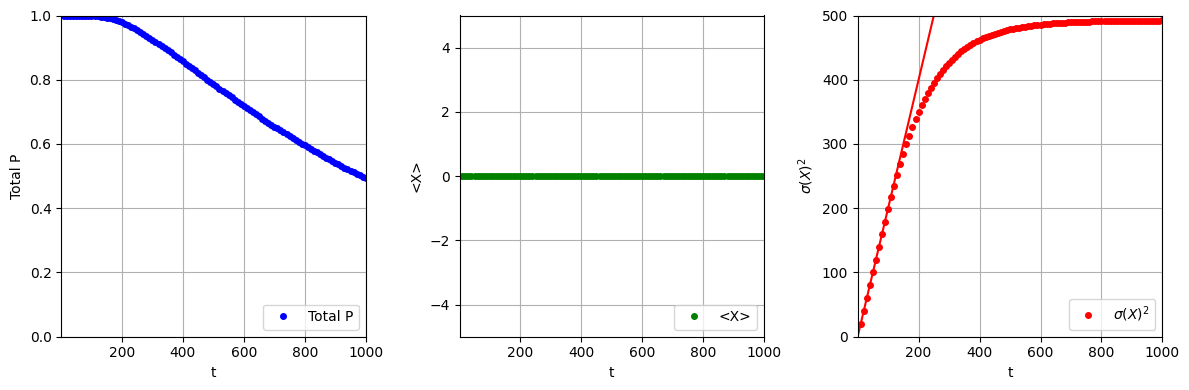

In [3]:
# Functions to calculate mean and standard deviation
def meanX(p, X):
    return np.dot(p, X) / np.sum(p)

def sdX(p, X):
    var = np.dot(p, X**2) / np.sum(p)
    return np.sqrt(var - meanX(p, X)**2)

num_sim = 100
meanX_all = np.zeros(num_sim)
sdX_all = np.zeros(num_sim)
p_tot_all = np.zeros(num_sim)

p_now = p0.copy()
for i in range(num_sim):
    p_now = pde_fd_diffusion(ngrid=ngrid, X_all=X_all, dX=dX, dt=dt, D=D, t0=0, t_total=10, p0=p_now) 
    meanX_all[i] = meanX(p_now, X_all)
    sdX_all[i] = sdX(p_now, X_all)
    p_tot_all[i] = np.sum(p_now)

t_all = 10 * np.arange(1, num_sim + 1)

# Plotting
plt.figure(figsize=(12, 4))

# Total P vs t
plt.subplot(1, 3, 1)
plt.plot(t_all, p_tot_all, 'bo', label='Total P', markersize = 4)
plt.xlabel('t')
plt.ylabel('Total P')
plt.xlim(1, l * 10)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='lower right')

# <X> vs t
plt.subplot(1, 3, 2)
plt.plot(t_all, meanX_all, 'go', label='<X>', markersize = 4)
plt.xlabel('t')
plt.ylabel('<X>')
plt.xlim(1, l * 10)
plt.ylim(-5, 5)
plt.grid(True)
plt.legend(loc='lower right')

# σ^2(X) vs t
plt.subplot(1, 3, 3)
plt.plot(t_all, sdX_all**2, 'ro', label=r'$\sigma(X)^2$', markersize = 4)
plt.xlabel('t')
plt.ylabel(r'$\sigma(X)^2$')
plt.xlim(1, l * 10)
plt.ylim(0, 500)
plt.grid(True)
plt.legend(loc='lower right')
# Creating vectors X and Y
x = np.linspace(0, 1000, 10)
y = x * D * 2
# Create the plot
plt.plot(x, y, 'r-')

plt.tight_layout()
plt.show()

The results show that $sd(X)^2 ~ t$ for small $t$. When the probability distribution $P(X,t)$ becomes nonzero near the boundary, the $sd^2$ increases smaller than $t$. (Think why the total probability decreases over time)

# Diffusion from the left

Now we consider another initial condition, where $P(X < 0, t = 0) = 1$. This means that at $t = 0$, the system starts from the left side of the $X$ axis. Here is a simulation of this diffusion model.

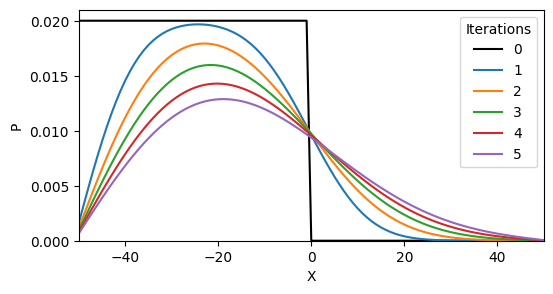

In [4]:
# Parameters
l = 100
dX = 1
dt = 0.01
D = 1
ngrid = int(l / dX) + 1

# Initialize X values for each grid point
X_all = (np.arange(1, ngrid + 1) - (ngrid + 1) / 2) * dX

# Initialize the state variable: a vector of P(X,t) for all grids at time t
p0 = np.zeros(ngrid)
p0[0:(int((ngrid + 1) / 2) - 1)] = 1  # Specify the initial condition, P = 1 for the whole left side.
p0 = p0/sum(p0)

plt.figure(figsize=(6,3))
# Plot initial condition
plt.plot(X_all, p0, color='black', label='0')

# Iteratively apply the finite difference method and plot results
p_now = p0.copy()
for i in range(5):
    p_now = pde_fd_diffusion(ngrid=ngrid, X_all=X_all, dX=dX, dt=dt, D=D, t0=0, t_total=50, p0=p_now)
    plt.plot(X_all, p_now, label=f"{i + 1}")

# Plot settings
plt.xlabel('X')
plt.ylabel('P')
plt.xlim(-50, 50)
plt.ylim(0, 0.021)
plt.legend(title='Iterations', loc='upper right')
plt.show()

We observe the diffusion from the left to the right over time.

# Other types of boundary conditions

We have introduced a type of boundary condition where the boundary points have zero probability. There are many other types of boundary conditions. Different boundary conditions usually result different dynamical behaviors. 

One common type of boundary condition for a PDE is Neumann boundary condition, where we set $\frac{\partial P}{\partial X}(X, t) = 0$ for both $X = -l/2$ and $X = l/2$. This boundary condition would ensure no probability flux outside the system. Since

$$\frac{\partial P}{\partial X}(X, t) = \frac{P(X + \Delta X, t) - P(X, t)}{\Delta X} = 0$$

Thus, we set $P(X,t)$ at a boundary point same as the $P(X,t)$ for the nearby grid point. The readers can implement this boundary condition for the diffusion models that we have described here and check what would be the differences of the diffusion dynamics. We leave this as an exercise.

A third type is a periodic boundary condition. For grid points ${X_i}$ for $i = 1,2 ...n$, we set $P(X_0) = P(X_n)$ and $P(X_{n+1}) = P(X_1)$. This will allow us to compute the needed partial derivatives for PDEs. This type of boundary conditions will be illustrated in [Part 07C](./07C.html).